## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering

### Import Libraries and Define Auxiliary Functions

We will import the following libraries the lab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

First, let's read the SpaceX dataset into a Pandas dataframe and print its summary

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


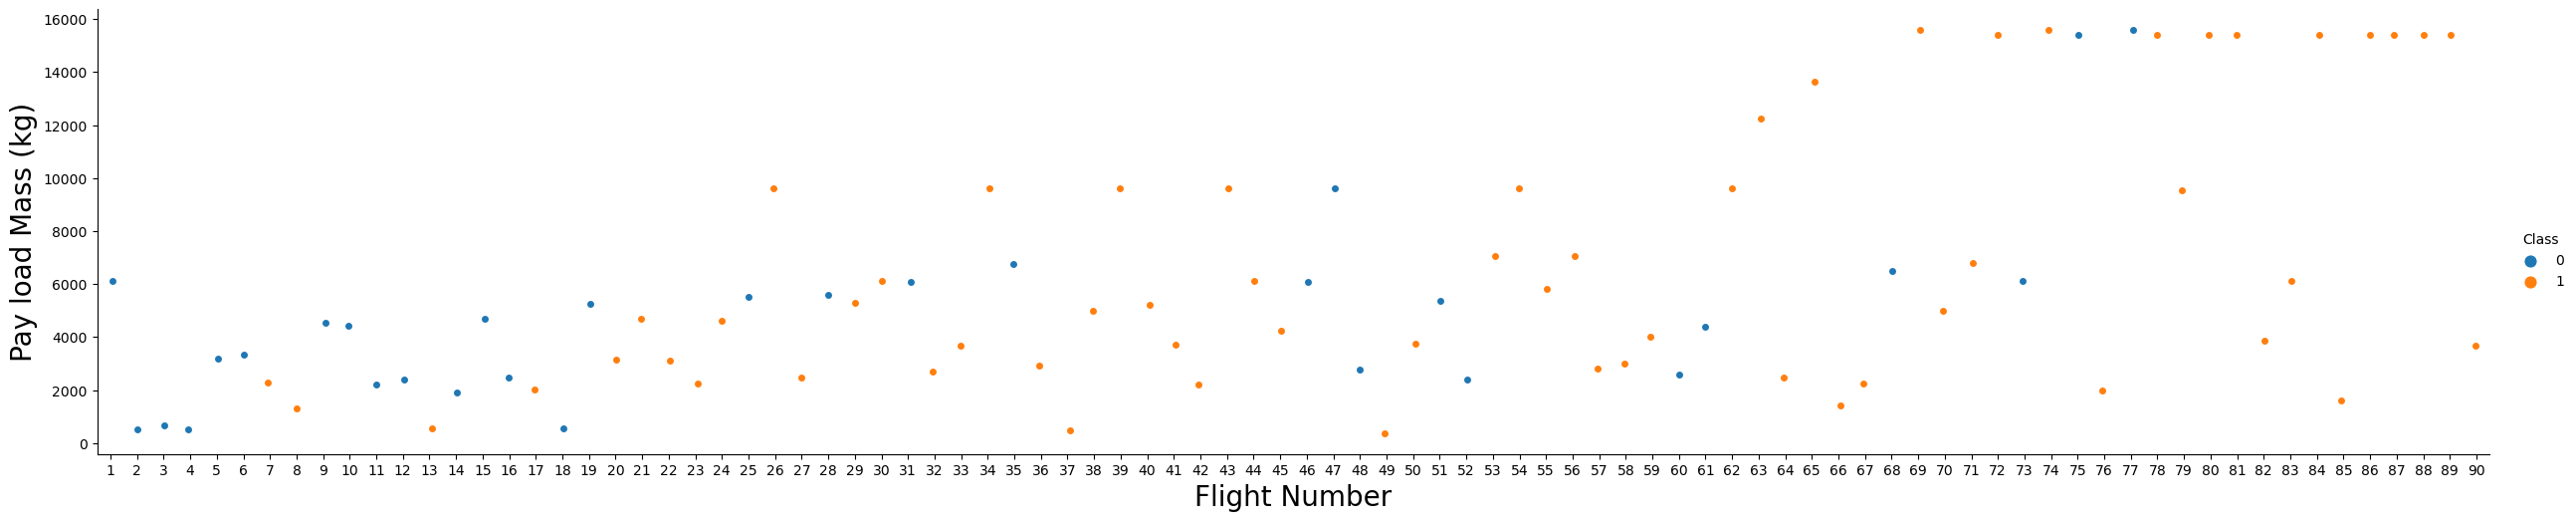

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.

Next, let's drill down to each site visualize its detailed launch records.

### TASK 1: Visualize the relationship between Flight Number and Launch Site

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>

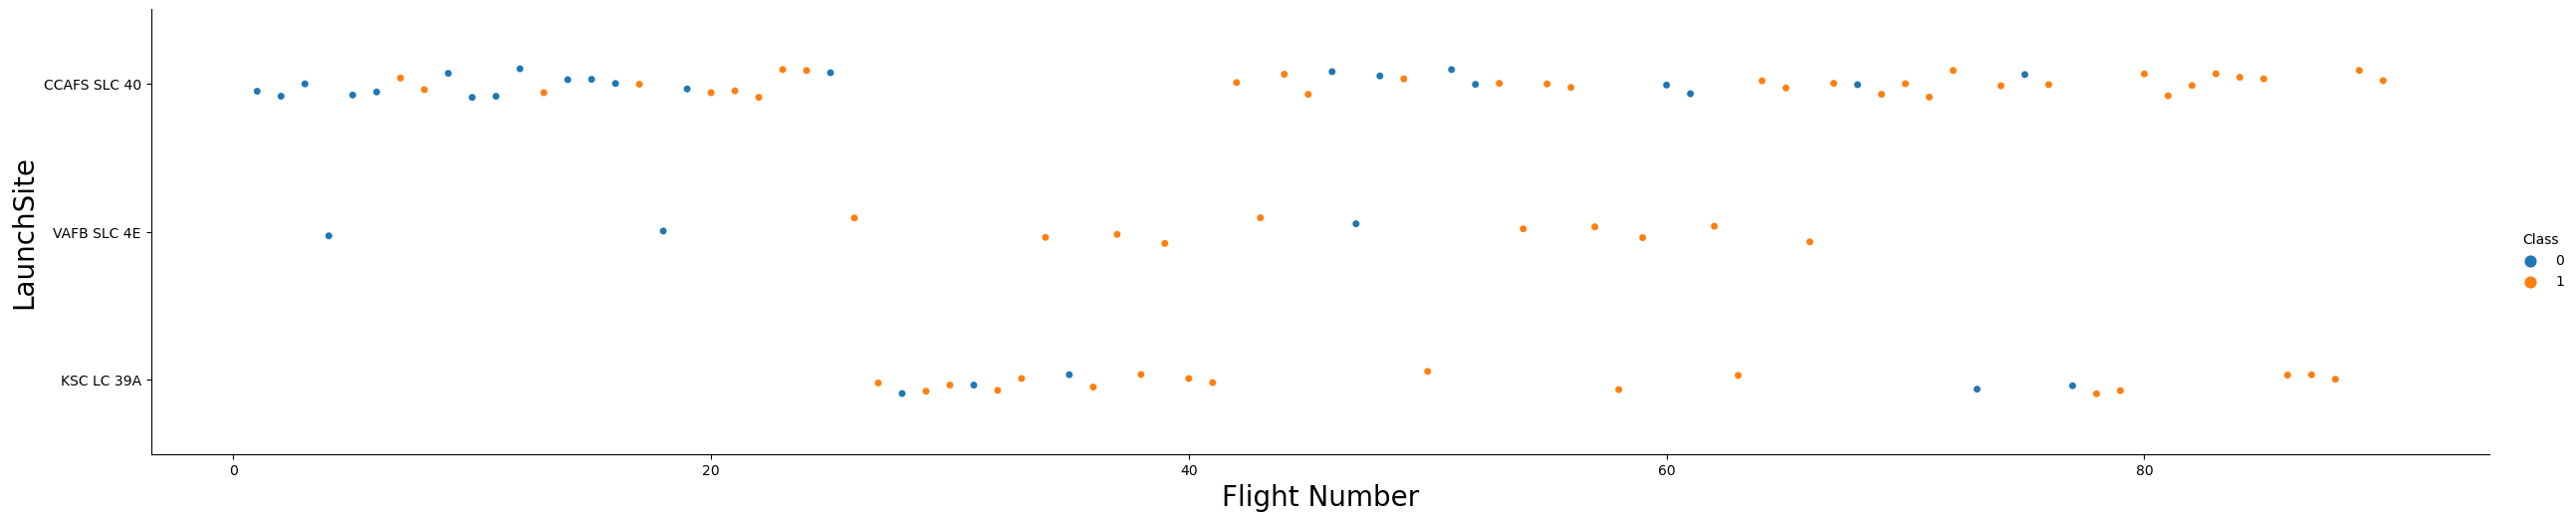

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.

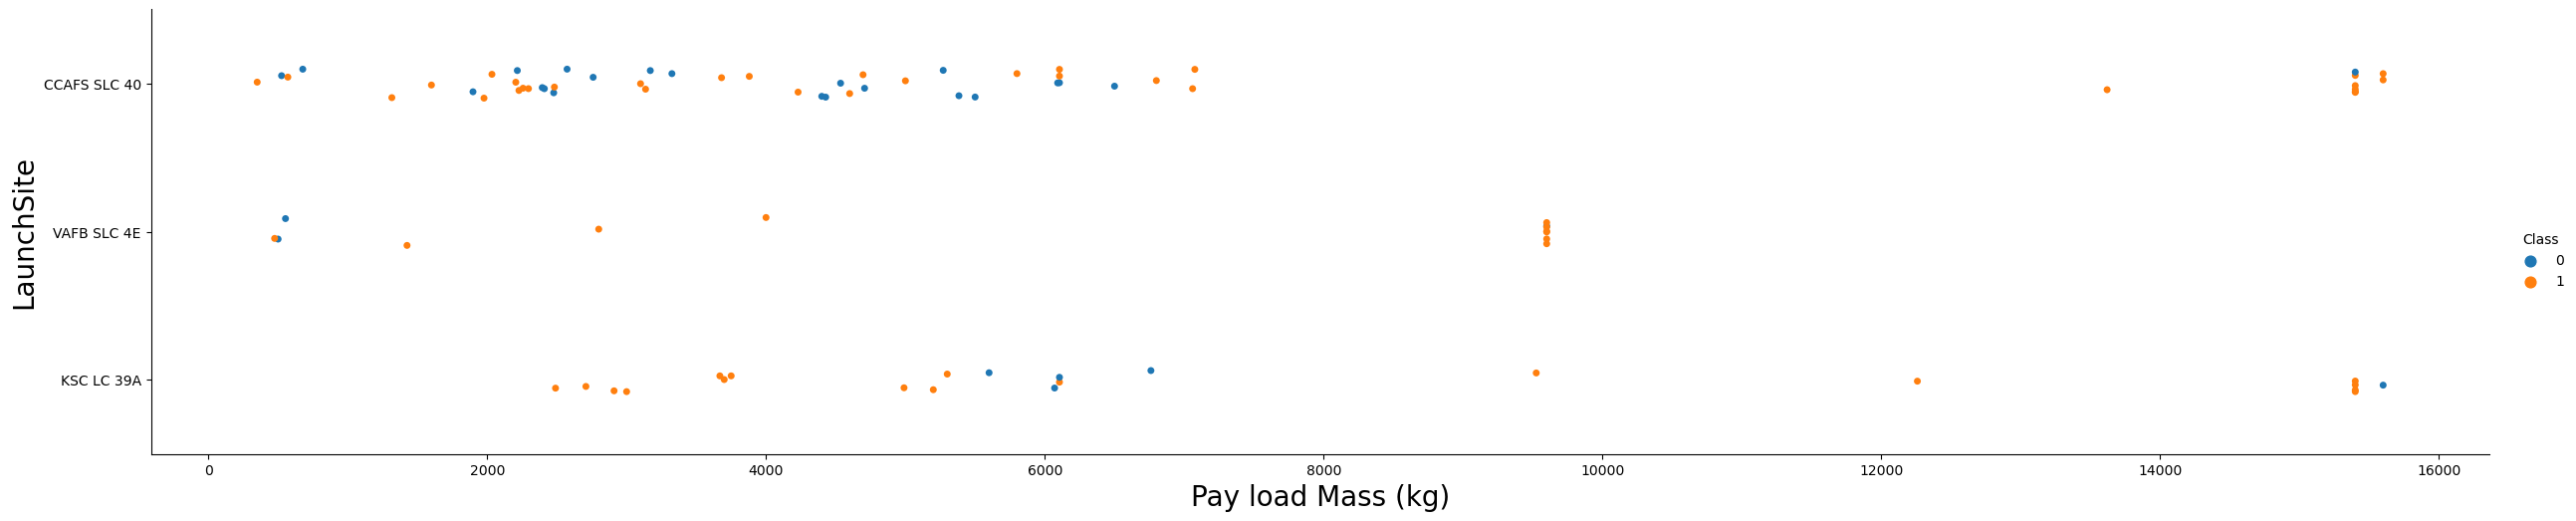

In [5]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Now try to explain any patterns you found in the Payload Vs. Launch Site scatter point chart.

### TASK  3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a `bar chart` for the sucess rate of each orbit

In [6]:
# HINT use groupby method on Orbit column and get the mean of Class column
orbit_grp = df.groupby('Orbit')['Class'].mean()
orbit_grp.dtype

dtype('float64')

In [7]:
list_success_rate=orbit_grp.values.tolist() 
list_success_rate

[1.0,
 1.0,
 0.5185185185185185,
 1.0,
 0.6190476190476191,
 0.7142857142857143,
 0.6666666666666666,
 0.6666666666666666,
 0.0,
 1.0,
 0.8571428571428571]

In [8]:
orbit_unique_label = orbit_grp.keys()
orbit_unique_label

Index(['ES-L1', 'GEO', 'GTO', 'HEO', 'ISS', 'LEO', 'MEO', 'PO', 'SO', 'SSO',
       'VLEO'],
      dtype='object', name='Orbit')

In [10]:
df2 = pd.DataFrame(columns = ['Orbit','Success_rate'])
df2['Orbit'] = orbit_unique_label
df2['Success_rate'] = list_success_rate
df2

,Orbit,Success_rate
0,ES-L1,1.000000
1,GEO,1.000000
2,GTO,0.518519
3,HEO,1.000000
4,ISS,0.619048
5,LEO,0.714286
6,MEO,0.666667
7,PO,0.666667
8,SO,0.000000
9,SSO,1.000000


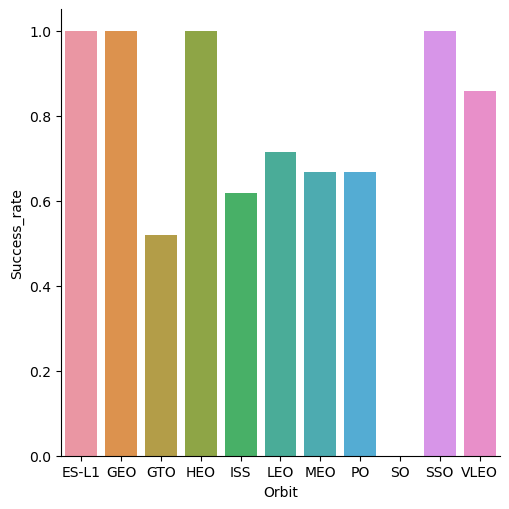

In [11]:
sns.catplot(x="Orbit", y="Success_rate", kind="bar", data=df2)
plt.show()

We see that different Orbit have different success rates.  <code>ES-L1,GEO,HEO and SSO</code>,has a success rate of 100%

### TASK  4: Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

In [12]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

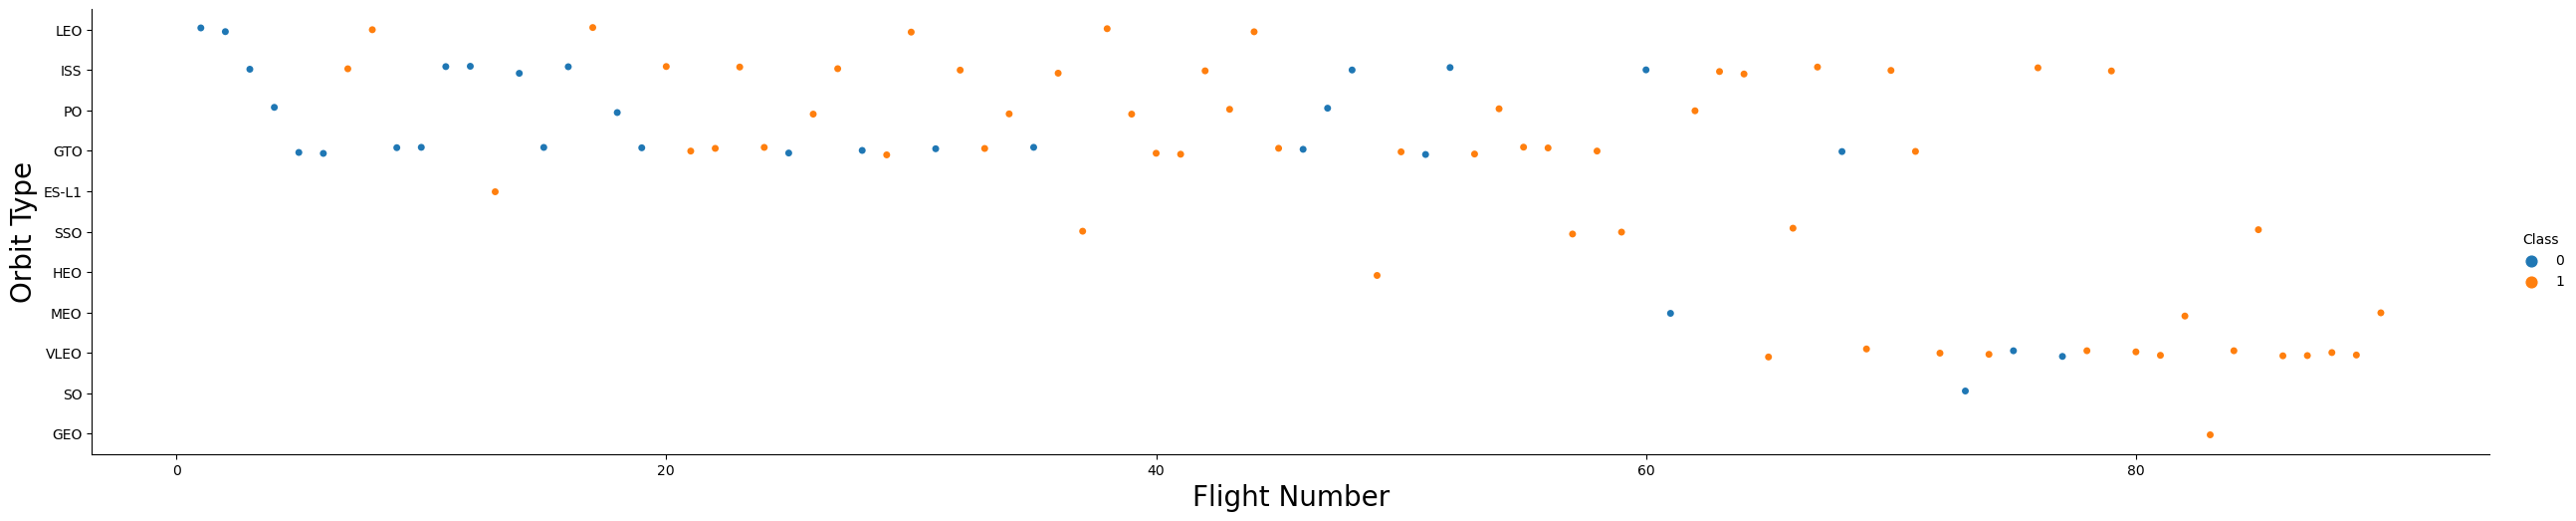

In [13]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

### TASK  5: Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

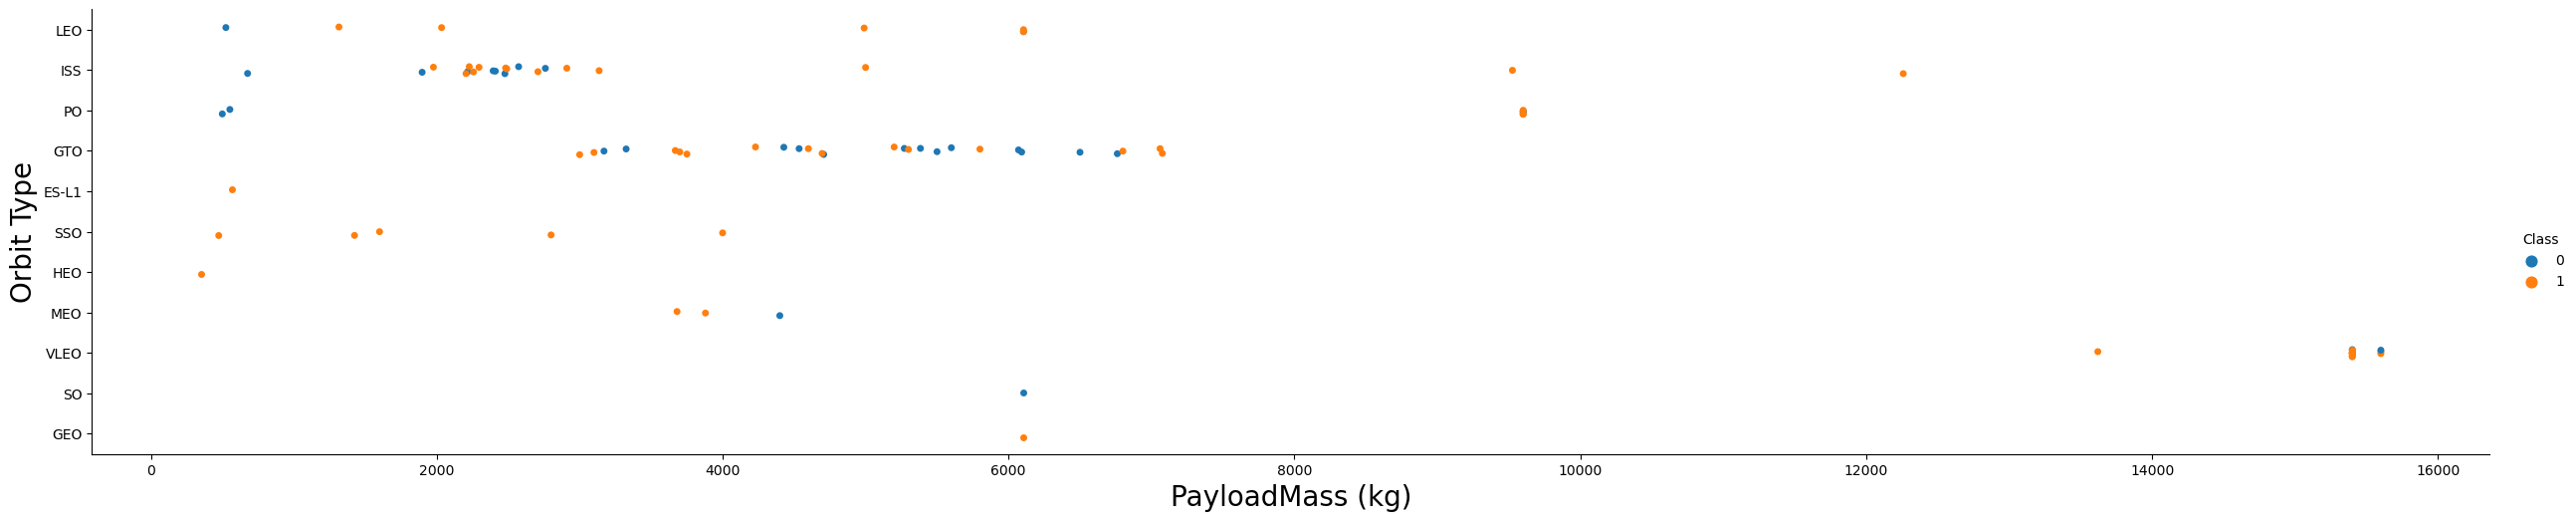

In [14]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass (kg)",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

### TASK  6: Visualize the launch success yearly trend

You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

In [21]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

In [28]:
year_grp = df.groupby('Date')['Class'].mean()
year_grp

Date
2010-06-04    0
2012-05-22    0
2013-03-01    0
2013-09-29    0
2013-12-03    0
             ..
2020-09-03    1
2020-10-06    1
2020-10-18    1
2020-10-24    1
2020-11-05    1
Name: Class, Length: 90, dtype: int64

In [29]:
#Success rate year wise
list_year_success_rate=year_grp.values.tolist() 
#list_year_success_rate

In [ ]:
#Extract year 
years = Extract_year(df['Date'])
years

In [38]:
#Make DataFRame
df3 = pd.DataFrame(columns = ['Year','Success_rate'])
df3['Year'] = years
df3['Success_rate'] = list_year_success_rate
df3

,Year,Success_rate
0,2010,0
1,2012,0
2,2013,0
3,2013,0
4,2013,0
...,...,...
85,2020,1
86,2020,1
87,2020,1
88,2020,1


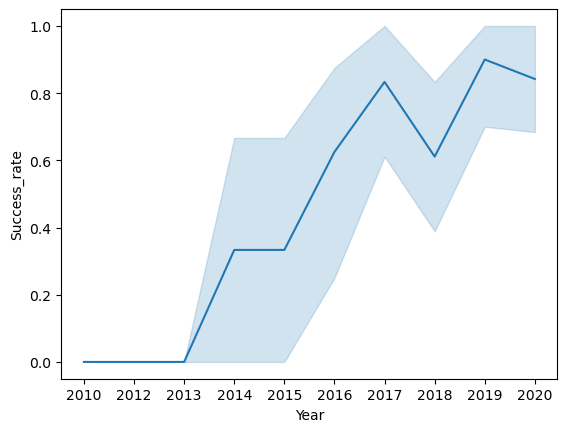

In [39]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.lineplot(x="Year", y="Success_rate",data=df3)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020

## Features Engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

In [ ]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns = ['Orbit', 'LaunchSite','LandingPad','Serial'])
print(features_one_hot)

In [ ]:
features_one_hot.columns

### TASK  8: Cast all numeric columns to `float64`

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>

In [ ]:
# HINT: use astype function
features_one_hot = features_one_hot.astype(float)

In [ ]:
features_one_hot.dtypes

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.

In [ ]:
features_one_hot.to_csv('dataset_part\_3.csv', index=False)